In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib


In [12]:
df = pd.read_excel('../Dataset/flood dataset.xlsx')
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [13]:
# Basic information
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


Temp           0
Humidity       0
Cloud Cover    0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
avgjune        0
sub            0
flood          0
dtype: int64

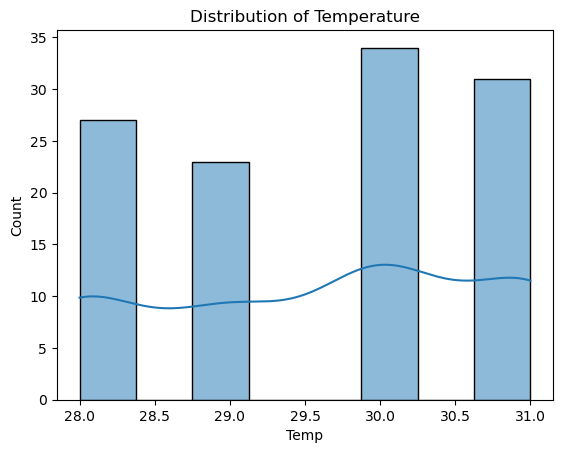

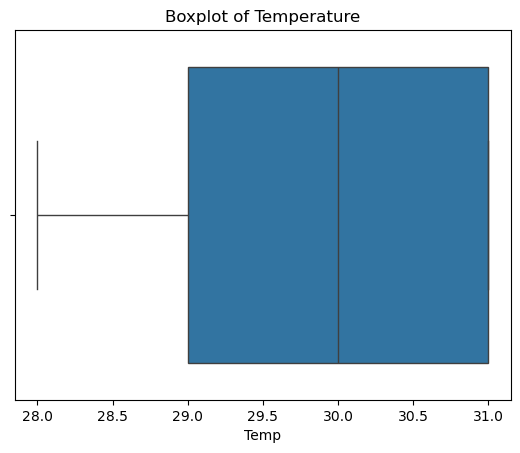

In [14]:
# Distribution plot
sns.histplot(df['Temp'], kde=True)
plt.title("Distribution of Temperature")
plt.show()

# Boxplot
sns.boxplot(x=df['Temp'])
plt.title("Boxplot of Temperature")
plt.show()

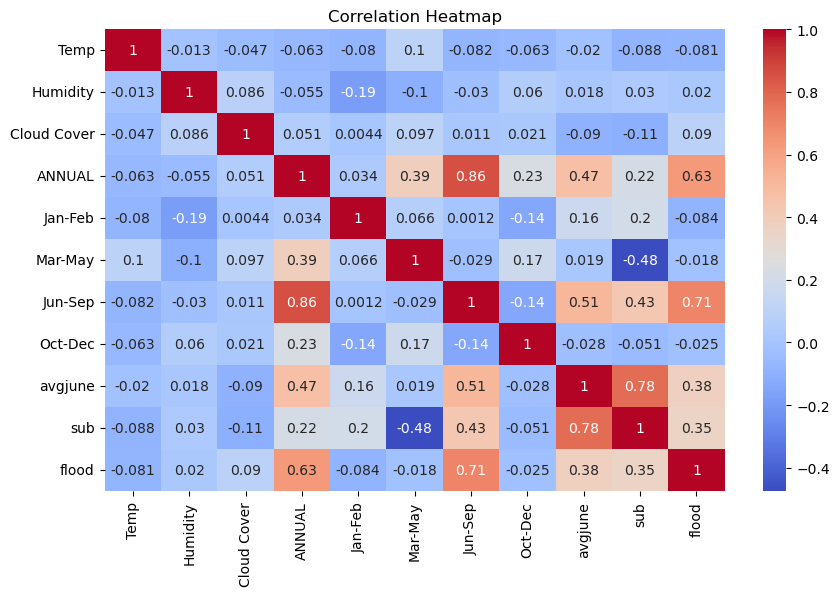

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Independent variables
X = df[['Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep']]
y = df['flood']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Step 1: Import OS (for safe folder creation)
import os

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the Flask folder if it doesn't exist
os.makedirs('../Flask', exist_ok=True)

# Step 4: Save the scaler inside Flask folder
import joblib
joblib.dump(scaler, '../Flask/transform.save')

print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [21]:
from sklearn.metrics import accuracy_score

# Create a dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n🔹 {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Sort by accuracy
results.sort(key=lambda x: x[1], reverse=True)

print("\n🔝 Model Performance (Sorted by Accuracy):")
for model_name, acc in results:
    print(f"{model_name}: {acc:.4f}")



🔹 Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


🔹 Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


🔹 KNN
Accuracy: 0.9565217391304348
Confusion Matrix:
 [[20  0]
 [ 1  2]]
Classification Report:
               precision    recall  f1-score   support

       

In [22]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier

# Make sure Flask folder exists
os.makedirs("../Flask", exist_ok=True)

# Train and save the model
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)

# Save the model
joblib.dump(best_model, "../Flask/floods.save")
print("✅ Random Forest model saved as floods.save!")


✅ Random Forest model saved as floods.save!
